In [6]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split

from pathlib import Path

In [7]:
# Load data
data = pd.read_csv(Path.cwd() / '..' / 'data' / '22_12_29_ga.csv')
errors = pickle.load(open(Path.cwd() / '..' / 'data' / 'df_errors.pkl', 'rb'))

In [8]:
usedf = data.drop(["Generation"], axis=1)

minus_err = errors["Minus_Errs"].values
plus_err = errors["Plus_Errs"].values
X = usedf.drop(['Fitness'], axis=1).values
y = usedf['Fitness'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_plus_errs, y_test_plus_errs, y_train_minus_errs, y_test_minus_errs = train_test_split(plus_err, minus_err, test_size=0.20, random_state=42)

mse_list = []
for i in range(100):
    xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.21,
                max_depth = 7, alpha = 3, n_estimators = 500)

    xgb_model.fit(X_train,y_train)
    
    mse_list.append(sklearn.metrics.mean_squared_error(y_test, xgb_model.predict(X_test)))

print(mse_list)

[0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.028160204018182006, 0.0281602

In [10]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.21,
                max_depth = 7, alpha = 3, n_estimators = 500)

xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)
    

0.028160204018182006


Mean squared error: 0.02816


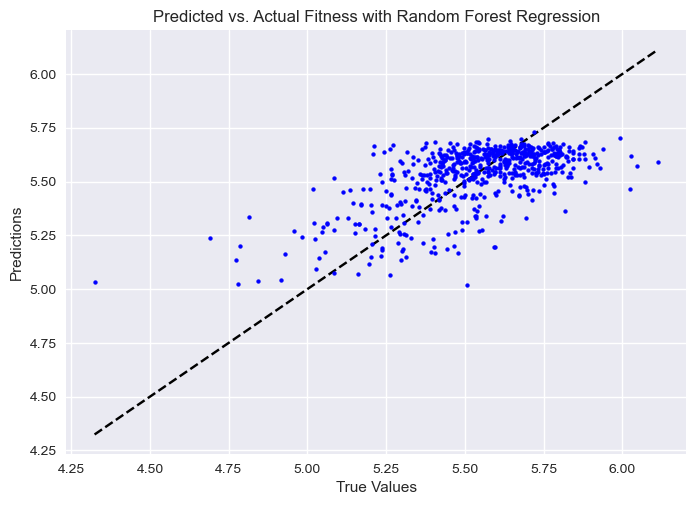

In [11]:
#print the mean squared error
print("Mean squared error: %.5f" % mse)
# Plot the predictions vs ground truth
# set style to seaborn
plt.style.use('seaborn')
plt.scatter(y_test, y_pred, s=30, c='b', marker='.', zorder=10)
minfit = np.min(y_test)
maxfit = np.max(y_test)
plt.plot([minfit, maxfit], [minfit, maxfit], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. Actual Fitness with Random Forest Regression')
plt.show()

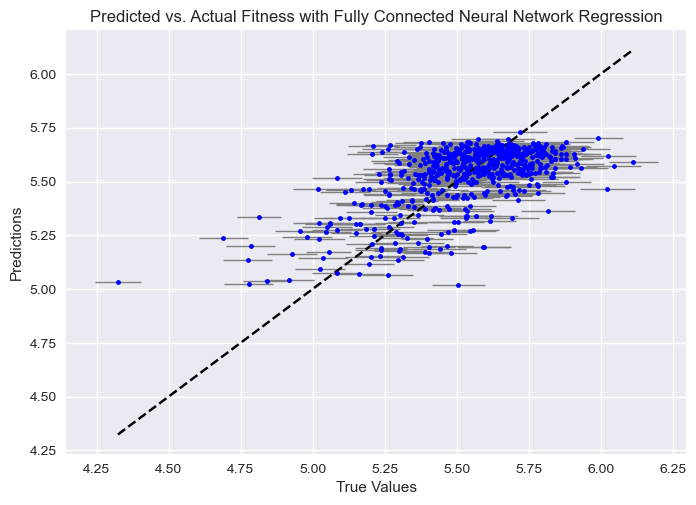

In [12]:
# set style to seaborn
plt.style.use('seaborn')
plt.errorbar(y_test, y_pred, xerr=[y_test_minus_errs, y_test_plus_errs], fmt='.', color='b',
                ecolor='gray', elinewidth=1, capsize=0.8)
minfit = np.min(y_test)
maxfit = np.max(y_test)
plt.plot([minfit, maxfit], [minfit, maxfit], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. Actual Fitness with Fully Connected Neural Network Regression')
plt.show()

In [13]:
# calculate the percentage of the predicted data that is within the error bars
total_in = 0
for i in range(len(y_test)):
    if y_test[i] - y_test_minus_errs[i] <= y_pred[i] <= y_test[i] + y_test_plus_errs[i]:
        total_in += 1
print("Percentage of predicted data within error bars: %.2f" % (total_in / len(y_test) * 100))

Percentage of predicted data within error bars: 41.29
